In [1]:
import numpy as np 
import pandas as pd
import os
import seaborn as sns
# Create a StandardScaler instance to normalize the data
from sklearn.preprocessing import MinMaxScaler
import math
import itertools
import time
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, matthews_corrcoef, f1_score, precision_score, recall_score, cohen_kappa_score, log_loss, roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Classifiers
from sklearn.svm import NuSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
# from tensorflow.keras.models import Sequential
#from mlxtend.classifier import StackingCVClassifier 

# from tensorflow import keras
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import InputLayer
# from tensorflow.keras.layers import Dense

#preprocessing

from collections import Counter
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

# Used to ignore warnings generated from StackingCVClassifier
import warnings
warnings.simplefilter('ignore')

In [2]:
wcols = """duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,
logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,
is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,
diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,
dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,
dst_host_srv_rerror_rate,label,difficulty_level"""
cols=[]
for c in wcols.split(','):
    if(c.strip()):
       cols.append(c.strip())

In [3]:
data_test=pd.read_csv(".\\KDDTest+.txt", names=cols)
#data = pd.read_csv(".\\KDDTrain+.txt", names=cols)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
print(data['label'].value_counts())
# print(data_test['label'].value_counts())

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64


In [ ]:
# data= pd.concat([data_train,data_test])

In [4]:
data.drop(['difficulty_level'],axis=1,inplace=True)
attack = {'normal': 'normal','apache2': 'Dos','back': 'Dos','land': 'Dos','neptune': 'Dos',
          'mailbomb': 'Dos','pod': 'Dos','processtable': 'Dos','smurf': 'Dos','teardrop': 'Dos',
          'udpstorm': 'Dos','worm': 'Dos','ftp_write': 'R2L','guess_passwd': 'R2L','httptunnel': 'R2L',
          'imap': 'R2L','multihop': 'R2L','named': 'R2L','phf': 'R2L','sendmail': 'R2L',
       'snmpgetattack': 'R2L','snmpguess': 'R2L','spy': 'R2L','warezclient': 'R2L','warezmaster': 'R2L',
       'xlock': 'R2L','xsnoop': 'R2L','ipsweep': 'Probe','mscan': 'Probe','nmap': 'Probe','portsweep': 'Probe',
       'saint': 'Probe','satan': 'Probe','buffer_overflow': 'U2R','loadmodule': 'U2R','perl': 'U2R','ps': 'U2R',
       'rootkit': 'U2R','sqlattack': 'U2R','xterm': 'U2R'}

In [5]:
data['label'] = data.label.apply(lambda r:attack[r[:]])
#data['State'] = data.label.apply(lambda r:result[r[:-1]])
#print(data.label.value_counts())
print(data['label'].value_counts())

normal    67343
Dos       45927
Probe     11656
R2L         995
U2R          52
Name: label, dtype: int64


In [6]:
data = data.dropna()
data= data.drop_duplicates()
data.reset_index(drop=True, inplace=True)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,1,0.0,0.0,0.0,0.0,0.08,0.15,0.00,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,123,6,1.0,1.0,0.0,0.0,0.05,0.07,0.00,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos
3,0,tcp,http,SF,232,8153,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,5,5,0.2,0.2,0.0,0.0,1.00,0.00,0.00,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,30,32,0.0,0.0,0.0,0.0,1.00,0.00,0.09,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125959,0,tcp,private,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,184,25,1.0,1.0,0.0,0.0,0.14,0.06,0.00,255,25,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,Dos
125960,8,udp,private,SF,105,145,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,244,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal
125961,0,tcp,smtp,SF,2231,384,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,30,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal
125962,0,tcp,klogin,S0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,144,8,1.0,1.0,0.0,0.0,0.06,0.05,0.00,255,8,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,Dos


In [7]:
# importing required libraries for normalizing data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
     # selecting numeric attributes columns from data
numeric_col = data.select_dtypes(include='number').columns     
# using standard scaler for normalizing
std_scaler = StandardScaler()
def normalization(df,col):
  for i in col:
    arr = df[i]
    arr = np.array(arr)
    df[i] = std_scaler.fit_transform(arr.reshape(len(arr),1))
  return df
# calling the normalization() function
numeric_data = normalization(data.copy(),numeric_col)
numeric_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110253,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,-0.717085,-0.354352,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,-0.324219,-0.818965,-0.782294,-0.280305,0.070186,-0.289115,-0.639564,-0.624902,-0.224553,-0.376402,normal
1,-0.110253,udp,other,SF,-0.007738,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,-0.621024,-0.368119,-0.637241,-0.631961,-0.374377,-0.374447,-1.321354,0.482160,-0.374537,0.734273,-1.035763,-1.160960,2.736741,2.368492,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,normal
2,-0.110253,tcp,private,S0,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,0.339590,-0.299285,1.602584,1.605024,-0.374377,-0.374447,-1.389593,0.038503,-0.374537,0.734273,-0.809932,-0.938215,-0.174444,-0.480113,-0.289115,1.608679,1.618875,-0.387651,-0.376402,Dos
3,-0.110253,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,-0.690887,-0.313052,-0.189276,-0.184564,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,-1.533925,1.258683,1.066483,-0.439097,-0.383002,0.066229,-0.572117,-0.602464,-0.387651,-0.345100,normal
4,-0.110253,tcp,http,SF,-0.007729,-0.004814,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,-0.472565,0.058656,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.028117,0.734273,1.258683,1.066483,-0.439097,-0.480113,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125959,-0.110253,tcp,private,S0,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,0.872294,-0.037713,1.602584,1.605024,-0.374377,-0.374447,-1.184875,-0.016954,-0.374537,0.734273,-0.818965,-0.938215,-0.121513,-0.480113,-0.289115,1.608679,1.618875,-0.387651,-0.376402,Dos
125960,-0.107182,udp,private,SF,-0.007745,-0.004883,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,-0.717085,-0.354352,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,0.734273,1.159318,0.977385,-0.386166,-0.447743,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,normal
125961,-0.110253,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,-0.725818,-0.368119,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,0.734273,-0.773799,-0.893667,-0.121513,-0.480113,-0.289115,0.979171,-0.624902,-0.355031,-0.376402,normal
125962,-0.110253,tcp,klogin,S0,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736

In [8]:
num_cols = numeric_data._get_numeric_data().columns
cate_cols = list(set(numeric_data.columns)-set(num_cols))
cate_cols.remove('label')
categorical = numeric_data[cate_cols]
categorical_data = pd.get_dummies(categorical,columns=cate_cols)
categorical_data

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125959,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
125960,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
125961,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
125962,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
# creating a dataframe with multi-class labels (Dos,Probe,R2L,U2R,normal)
multi_data = numeric_data.copy()
multi_label = pd.DataFrame(multi_data.label)
multi_data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,-0.110253,tcp,ftp_data,SF,-0.007679,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,-0.717085,-0.354352,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,-0.324219,-0.818965,-0.782294,-0.280305,0.070186,-0.289115,-0.639564,-0.624902,-0.224553,-0.376402,normal
1,-0.110253,udp,other,SF,-0.007738,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,-0.621024,-0.368119,-0.637241,-0.631961,-0.374377,-0.374447,-1.321354,0.482160,-0.374537,0.734273,-1.035763,-1.160960,2.736741,2.368492,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,normal
2,-0.110253,tcp,private,S0,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,0.339590,-0.299285,1.602584,1.605024,-0.374377,-0.374447,-1.389593,0.038503,-0.374537,0.734273,-0.809932,-0.938215,-0.174444,-0.480113,-0.289115,1.608679,1.618875,-0.387651,-0.376402,Dos
3,-0.110253,tcp,http,SF,-0.007723,-0.002891,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,-0.690887,-0.313052,-0.189276,-0.184564,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,-1.533925,1.258683,1.066483,-0.439097,-0.383002,0.066229,-0.572117,-0.602464,-0.387651,-0.345100,normal
4,-0.110253,tcp,http,SF,-0.007729,-0.004814,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,-0.472565,0.058656,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.028117,0.734273,1.258683,1.066483,-0.439097,-0.480113,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125959,-0.110253,tcp,private,S0,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,0.872294,-0.037713,1.602584,1.605024,-0.374377,-0.374447,-1.184875,-0.016954,-0.374537,0.734273,-0.818965,-0.938215,-0.121513,-0.480113,-0.289115,1.608679,1.618875,-0.387651,-0.376402,Dos
125960,-0.107182,udp,private,SF,-0.007745,-0.004883,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,-0.717085,-0.354352,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,0.734273,1.159318,0.977385,-0.386166,-0.447743,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,normal
125961,-0.110253,tcp,smtp,SF,-0.007382,-0.004823,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,-0.725818,-0.368119,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,0.734273,-0.773799,-0.893667,-0.121513,-0.480113,-0.289115,0.979171,-0.624902,-0.355031,-0.376402,normal
125962,-0.110253,tcp,klogin,S0,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736

In [11]:
label_=multi_data['label']

multi_data.drop('label', axis=1, inplace=True)
multi_data.drop('protocol_type', axis=1, inplace=True)
multi_data.drop('service', axis=1, inplace=True)
multi_data.drop('flag', axis=1, inplace=True)
# multi_data.drop('num_outbound_cmds', axis=1, inplace=True)
multi_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.110253,-0.007679,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,-0.717085,-0.354352,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,-0.324219,-0.818965,-0.782294,-0.280305,0.070186,-0.289115,-0.639564,-0.624902,-0.224553,-0.376402
1,-0.110253,-0.007738,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,-0.621024,-0.368119,-0.637241,-0.631961,-0.374377,-0.374447,-1.321354,0.482160,-0.374537,0.734273,-1.035763,-1.160960,2.736741,2.368492,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402
2,-0.110253,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,0.339590,-0.299285,1.602584,1.605024,-0.374377,-0.374447,-1.389593,0.038503,-0.374537,0.734273,-0.809932,-0.938215,-0.174444,-0.480113,-0.289115,1.608679,1.618875,-0.387651,-0.376402
3,-0.110253,-0.007723,-0.002891,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,-0.690887,-0.313052,-0.189276,-0.184564,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,-1.533925,1.258683,1.066483,-0.439097,-0.383002,0.066229,-0.572117,-0.602464,-0.387651,-0.345100
4,-0.110253,-0.007729,-0.004814,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,-0.472565,0.058656,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.028117,0.734273,1.258683,1.066483,-0.439097,-0.480113,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125959,-0.110253,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,0.872294,-0.037713,1.602584,1.605024,-0.374377,-0.374447,-1.184875,-0.016954,-0.374537,0.734273,-0.818965,-0.938215,-0.121513,-0.480113,-0.289115,1.608679,1.618875,-0.387651,-0.376402
125960,-0.107182,-0.007745,-0.004883,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,-0.717085,-0.354352,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,0.734273,1.159318,0.977385,-0.386166,-0.447743,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402
125961,-0.110253,-0.007382,-0.004823,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,-0.725818,-0.368119,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,0.734273,-0.773799,-0.893667,-0.121513,-0.480113,-0.289115,0.979171,-0.624902,-0.355031,-0.376402
125962,-0.110253,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,0.522980,-0.271751,1.602584,1.605024,-0.374377,-0.374447,-1.366847,-0.072411,-0.374537,0.734273,-0

In [12]:
multi_data=multi_data.join(categorical_data)
multi_data=multi_data.join(label_)
multi_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,label
0,-0.110253,-0.007679,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,-0.717085,-0.354352,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,-0.324219,-0.818965,-0.782294,-0.280305,0.070186,-0.289115,-0.639564,-0.624902,-0.224553,-0.376402,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,normal
1,-0.110253,-0.007738,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,-0.621024,-0.368119,-0.637241,-0.631961,-0.374377,-0.374447,-1.321354,0.482160,-0.374537,0.734273,-1.035763,-1.160960,2.736741,2.368492,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,normal
2,-0.110253,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,0.339590,-0.299285,1.602584,1.605024,-0.374377,-0.374447,-1.389593,0.038503,-0.374537,0.734273,-0.809932,-0.938215,-0.174444,-0.480113,-0.289115,1.608679,1.618875,-0.387651,-0.376402,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Dos
3,-0.110253,-0.007723,-0.002891,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,-0.690887,-0.313052,-0.189276,-0.184564,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,-1.533925,1.258683,1.066483,-0.439097,-0.383002,0.066229,-0.572117,-0.602464,-0.387651,-0.345100,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,normal
4,-0.110253,-0.007729,-0.004814,-0.014089,-0.08949,-0

In [14]:
multi_data = multi_data.dropna()
multi_data= multi_data.drop_duplicates()
multi_data.shape

(125964, 123)

In [15]:
multi_data['label'].unique()

array(['normal', 'Dos', 'R2L', 'Probe', 'U2R'], dtype=object)

In [18]:
############################################## NEWDF IS THE NEW DATASET with target, flag, service one hot encoded
# Rename every attack target: 0=normal, 1=DoS, 2=Probe, 3=R2L and 4=U2R.

labeldf=multi_data['label']

newlabeldf=labeldf.replace({'normal' : 0, 'Dos' : 1 ,'Probe' : 2,'R2L' : 3,'U2R' : 4})

# put the new label column back
multi_data['target'] = newlabeldf
multi_data.drop('label', axis=1, inplace=True)
print(multi_data['target'])

0         0
1         0
2         1
3         0
4         0
         ..
125959    1
125960    0
125961    0
125962    1
125963    0
Name: target, Length: 125964, dtype: int64


In [21]:
# finding the attributes which have more than 0.5 correlation with encoded attack label attribute 
corr = multi_data.corr()
# plt.figure(figsize=(15,12))
# sns.heatmap(corr)
# plt.show()
corr_y = abs(corr['target'])
highest_corr = corr_y[corr_y >0.4]
highest_corr.sort_values(ascending=True)

same_srv_rate             0.511072
service_http              0.511484
dst_host_same_srv_rate    0.526086
flag_SF                   0.548860
logged_in                 0.576013
dst_host_srv_count        0.624208
target                    1.000000
Name: target, dtype: float64

In [26]:
multi_data

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,flag_OTH,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,service_csnet_ns,service_ctf,service_daytime,service_discard,service_domain,service_domain_u,service_echo,service_eco_i,service_ecr_i,service_efs,service_exec,service_finger,service_ftp,service_ftp_data,service_gopher,service_harvest,service_hostnames,service_http,service_http_2784,service_http_443,service_http_8001,service_imap4,service_iso_tsap,service_klogin,service_kshell,service_ldap,service_link,service_login,service_mtp,service_name,service_netbios_dgm,service_netbios_ns,service_netbios_ssn,service_netstat,service_nnsp,service_nntp,service_ntp_u,service_other,service_pm_dump,service_pop_2,service_pop_3,service_printer,service_private,service_red_i,service_remote_job,service_rje,service_shell,service_smtp,service_sql_net,service_ssh,service_sunrpc,service_supdup,service_systat,service_telnet,service_tftp_u,service_tim_i,service_time,service_urh_i,service_urp_i,service_uucp,service_uucp_path,service_vmnet,service_whois,target
0,-0.110253,-0.007679,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,-0.717085,-0.354352,-0.637241,-0.631961,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,-0.324219,-0.818965,-0.782294,-0.280305,0.070186,-0.289115,-0.639564,-0.624902,-0.224553,-0.376402,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,-0.110253,-0.007738,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,-0.621024,-0.368119,-0.637241,-0.631961,-0.374377,-0.374447,-1.321354,0.482160,-0.374537,0.734273,-1.035763,-1.160960,2.736741,2.368492,-0.289115,-0.639564,-0.624902,-0.387651,-0.376402,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,-0.110253,-0.007763,-0.004919,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,-0.809310,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,0.339590,-0.299285,1.602584,1.605024,-0.374377,-0.374447,-1.389593,0.038503,-0.374537,0.734273,-0.809932,-0.938215,-0.174444,-0.480113,-0.289115,1.608679,1.618875,-0.387651,-0.376402,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,-0.110253,-0.007723,-0.002891,-0.014089,-0.08949,-0.007736,-0.095079,-0.027024,1.235621,-0.011664,-0.036653,-0.024437,-0.012386,-0.026181,-0.018611,-0.041223,0.0,-0.002818,-0.097534,-0.690887,-0.313052,-0.189276,-0.184564,-0.374377,-0.374447,0.771327,-0.349697,-0.374537,-1.533925,1.258683,1.066483,-0.439097,-0.383002,0.066229,-0.572117,-0.602464,-0.387651,-0.345100,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,-0.110253,-0.007729,-0.004814,-0.014089,-0.08949,-0.007736,-0.09507

In [27]:
### SELECTING TOP 30 FEATURES ON BASIS OF CORELATION
highly_correlated = multi_data.corr().abs()['target'].sort_values(ascending=False)
highly_correlated[:31]

target                         1.000000
dst_host_srv_count             0.624208
logged_in                      0.576013
flag_SF                        0.548860
dst_host_same_srv_rate         0.526086
service_http                   0.511484
same_srv_rate                  0.511072
service_private                0.398993
dst_host_diff_srv_rate         0.391454
count                          0.388530
dst_host_srv_serror_rate       0.384951
dst_host_serror_rate           0.382275
serror_rate                    0.381803
srv_serror_rate                0.378824
flag_S0                        0.373701
service_eco_i                  0.338229
dst_host_same_src_port_rate    0.318826
dst_host_srv_rerror_rate       0.310331
srv_rerror_rate                0.310012
rerror_rate                    0.308771
dst_host_rerror_rate           0.293908
protocol_type_icmp             0.292514
diff_srv_rate                  0.282409
flag_RSTR                      0.256043
dst_host_srv_diff_host_rate    0.239725


In [28]:
list(highly_correlated[:31].index)

['target',
 'dst_host_srv_count',
 'logged_in',
 'flag_SF',
 'dst_host_same_srv_rate',
 'service_http',
 'same_srv_rate',
 'service_private',
 'dst_host_diff_srv_rate',
 'count',
 'dst_host_srv_serror_rate',
 'dst_host_serror_rate',
 'serror_rate',
 'srv_serror_rate',
 'flag_S0',
 'service_eco_i',
 'dst_host_same_src_port_rate',
 'dst_host_srv_rerror_rate',
 'srv_rerror_rate',
 'rerror_rate',
 'dst_host_rerror_rate',
 'protocol_type_icmp',
 'diff_srv_rate',
 'flag_RSTR',
 'dst_host_srv_diff_host_rate',
 'service_domain_u',
 'flag_REJ',
 'dst_host_count',
 'service_smtp',
 'protocol_type_udp',
 'duration']

In [29]:
df_new = multi_data[list(highly_correlated[:31].index)]

In [30]:
df_new

,target,dst_host_srv_count,logged_in,flag_SF,dst_host_same_srv_rate,service_http,same_srv_rate,service_private,dst_host_diff_srv_rate,count,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,flag_S0,service_eco_i,dst_host_same_src_port_rate,dst_host_srv_rerror_rate,srv_rerror_rate,rerror_rate,dst_host_rerror_rate,protocol_type_icmp,diff_srv_rate,flag_RSTR,dst_host_srv_diff_host_rate,service_domain_u,flag_REJ,dst_host_count,service_smtp,protocol_type_udp,duration
0,0,-0.818965,-0.809310,1,-0.782294,0,0.771327,0,-0.280305,-0.717085,-0.624902,-0.639564,-0.637241,-0.631961,0,0,0.070186,-0.376402,-0.374447,-0.374377,-0.224553,0,-0.349697,0,-0.289115,0,0,-0.324219,0,0,-0.110253
1,0,-1.035763,-0.809310,1,-1.160960,0,-1.321354,0,2.736741,-0.621024,-0.624902,-0.639564,-0.637241,-0.631961,0,0,2.368492,-0.376402,-0.374447,-0.374377,-0.387651,0,0.482160,0,-0.289115,0,0,0.734273,0,1,-0.110253
2,1,-0.809932,-0.809310,0,-0.938215,0,-1.389593,1,-0.174444,0.339590,1.618875,1.608679,1.602584,1.605024,1,0,-0.480113,-0.376402,-0.374447,-0.374377,-0.387651,0,0.038503,0,-0.289115,0,0,0.734273,0,0,-0.110253
3,0,1.258683,1.235621,1,1.066483,1,0.771327,0,-0.439097,-0.690887,-0.602464,-0.572117,-0.189276,-0.184564,0,0,-0.383002,-0.345100,-0.374447,-0.374377,-0.387651,0,-0.349697,0,0.066229,0,0,-1.533925,0,0,-0.110253
4,0,1.258683,1.235621,1,1.066483,1,0.771327,0,-0.439097,-0.472565,-0.624902,-0.639564,-0.637241,-0.631961,0,0,-0.480113,-0.376402,-0.374447,-0.374377,-0.387651,0,-0.349697,0,-0.289115,0,0,0.734273,0,0,-0.110253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125959,1,-0.818965,-0.809310,0,-0.938215,0,-1.184875,1,-0.121513,0.872294,1.618875,1.608679,1.602584,1.605024,1,0,-0.480113,-0.376402,-0.374447,-0.374377,-0.387651,0,-0.016954,0,-0.289115,0,0,0.734273,0,0,-0.110253
125960,0,1.159318,-0.809310,1,0.977385,0,0.771327,1,-0.386166,-0.717085,-0.624902,-0.639564,-0.637241,-0.631961,0,0,-0.447743,-0.376402,-0.374447,-0.374377,-0.387651,0,-0.349697,0,-0.289115,0,0,0.734273,0,1,-0.107182
125961,0,-0.773799,1.235621,1,-0.893667,0,0.771327,0,-0.121513,-0.725818,-0.624902,0.979171,-0.637241,-0.631961,0,0,-0.480113,-0.376402,-0.374447,-0.374377,-0.355031,0,-0.349697,0,-0.289115,0,0,0.734273,1,0,-0.110253
125962,1,-0.972530,-0.809310,0,-1.094136,0,-1.366847,0,-0.174444,0.522980,1.618875,1.608679,1.602584,1.605024,1,0,-0.480113,-0.376402,-0.374447,-0.374377,-0.387651,0,-0.072411,0,-0.289115,0,0,0.734273,0,0,-0.110253


In [ ]:
# df_new.to_csv('.\\dataset_merged.csv')

## SMOTE (Synthetic Minority Oversampling TEchnique) oversampling for imbalanced multi-class classification

Class=0, n=67343 (53.462%)
Class=1, n=45927 (36.460%)
Class=3, n=995 (0.790%)
Class=2, n=11647 (9.246%)
Class=4, n=52 (0.041%)


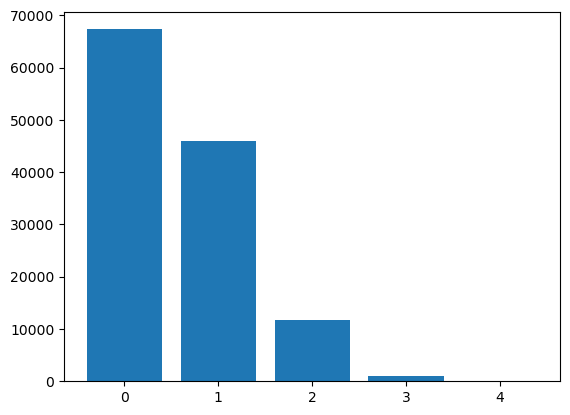

In [32]:
from collections import Counter

from sklearn.preprocessing import LabelEncoder

data = df_new.values
# split into input and output elements
# X, y = data[:, :-1], data[:, -1]
X = df_new.drop(columns = 'target')
y = df_new['target']

counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot original distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=0, n=67343 (20.000%)
Class=1, n=67343 (20.000%)
Class=3, n=67343 (20.000%)
Class=2, n=67343 (20.000%)
Class=4, n=67343 (20.000%)


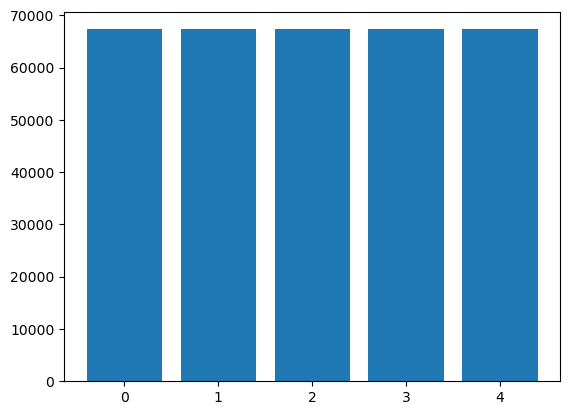

In [33]:
# SMOTE will oversample all classes to have the same number of examples as the class with the most examples
# example of oversampling a multi-class classification dataset

from imblearn.over_sampling import SMOTE

from sklearn.preprocessing import LabelEncoder

# data = df.values
# split into input and output elements
# X, y = data[:, :-1], data[:, -1]
# label encode the target variable
# y = LabelEncoder().fit_transform(y)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
 per = v / len(y) * 100
 print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [36]:
col_name = list(df_new.columns)
del col_name[0]
len(col_name)

30

In [37]:
pd_x=pd.DataFrame(X,columns=col_name)
pd_x

,dst_host_srv_count,logged_in,flag_SF,dst_host_same_srv_rate,service_http,same_srv_rate,service_private,dst_host_diff_srv_rate,count,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,flag_S0,service_eco_i,dst_host_same_src_port_rate,dst_host_srv_rerror_rate,srv_rerror_rate,rerror_rate,dst_host_rerror_rate,protocol_type_icmp,diff_srv_rate,flag_RSTR,dst_host_srv_diff_host_rate,service_domain_u,flag_REJ,dst_host_count,service_smtp,protocol_type_udp,duration
0,-0.818965,-0.809310,1,-0.782294,0,0.771327,0,-0.280305,-0.717085,-0.624902,-0.639564,-0.637241,-0.631961,0,0,0.070186,-0.376402,-0.374447,-0.374377,-0.224553,0,-0.349697,0,-0.289115,0,0,-0.324219,0,0,-0.110253
1,-1.035763,-0.809310,1,-1.160960,0,-1.321354,0,2.736741,-0.621024,-0.624902,-0.639564,-0.637241,-0.631961,0,0,2.368492,-0.376402,-0.374447,-0.374377,-0.387651,0,0.482160,0,-0.289115,0,0,0.734273,0,1,-0.110253
2,-0.809932,-0.809310,0,-0.938215,0,-1.389593,1,-0.174444,0.339590,1.618875,1.608679,1.602584,1.605024,1,0,-0.480113,-0.376402,-0.374447,-0.374377,-0.387651,0,0.038503,0,-0.289115,0,0,0.734273,0,0,-0.110253
3,1.258683,1.235621,1,1.066483,1,0.771327,0,-0.439097,-0.690887,-0.602464,-0.572117,-0.189276,-0.184564,0,0,-0.383002,-0.345100,-0.374447,-0.374377,-0.387651,0,-0.349697,0,0.066229,0,0,-1.533925,0,0,-0.110253
4,1.258683,1.235621,1,1.066483,1,0.771327,0,-0.439097,-0.472565,-0.624902,-0.639564,-0.637241,-0.631961,0,0,-0.480113,-0.376402,-0.374447,-0.374377,-0.387651,0,-0.349697,0,-0.289115,0,0,0.734273,0,0,-0.110253
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336710,-0.443614,1.235621,1,1.066483,0,0.771327,0,-0.439097,-0.725818,-0.624902,-0.639564,-0.637241,-0.631961,0,0,2.756939,-0.312706,-0.374447,-0.374377,-0.387651,0,-0.349697,0,0.394721,0,0,-1.826271,0,0,-0.104081
336711,-1.012211,1.235621,1,1.066483,0,0.771327,0,-0.439097,-0.725818,-0.624902,-0.639564,-0.637241,-0.631961,0,0,0.430865,-0.376402,-0.374447,-0.374377,-0.387651,0,-0.349697,0,-0.289115,0,0,-1.799988,0,0,-0.067509
336712,-0.302367,1.235621,1,1.066483,0,0.771327,0,-0.439097,-0.715439,-0.624902,-0.639564,-0.637241,-0.631961,0,0,2.756939,-0.376402,-0.374447,-0.374377,-0.387651,0,-0.349697,0,-0.111443,0,0,-1.814290,0,0,-0.110253
336713,-1.030388,1.235621,1,-0.372156,0,0.771327,0,3.294487,-0.725818,-0.624902,-0.639564,-0.637241,-0.631961,0,0,0.280996,-0.376402,-0.374447,-0.374377,-0.387651,0,-0.349697,0,-0.289115,0,0,-1.793029,0,0,-0.104824


In [38]:
pd_y=pd.DataFrame(y, columns=['target'])
pd_y

,target
0,0
1,0
2,1
3,0
4,0
...,...
336710,4
336711,4
336712,4
336713,4


In [39]:
df_final= pd_x.join(pd_y)

In [40]:
df_final

,dst_host_srv_count,logged_in,flag_SF,dst_host_same_srv_rate,service_http,same_srv_rate,service_private,dst_host_diff_srv_rate,count,dst_host_srv_serror_rate,dst_host_serror_rate,serror_rate,srv_serror_rate,flag_S0,service_eco_i,dst_host_same_src_port_rate,dst_host_srv_rerror_rate,srv_rerror_rate,rerror_rate,dst_host_rerror_rate,protocol_type_icmp,diff_srv_rate,flag_RSTR,dst_host_srv_diff_host_rate,service_domain_u,flag_REJ,dst_host_count,service_smtp,protocol_type_udp,duration,target
0,-0.818965,-0.809310,1,-0.782294,0,0.771327,0,-0.280305,-0.717085,-0.624902,-0.639564,-0.637241,-0.631961,0,0,0.070186,-0.376402,-0.374447,-0.374377,-0.224553,0,-0.349697,0,-0.289115,0,0,-0.324219,0,0,-0.110253,0
1,-1.035763,-0.809310,1,-1.160960,0,-1.321354,0,2.736741,-0.621024,-0.624902,-0.639564,-0.637241,-0.631961,0,0,2.368492,-0.376402,-0.374447,-0.374377,-0.387651,0,0.482160,0,-0.289115,0,0,0.734273,0,1,-0.110253,0
2,-0.809932,-0.809310,0,-0.938215,0,-1.389593,1,-0.174444,0.339590,1.618875,1.608679,1.602584,1.605024,1,0,-0.480113,-0.376402,-0.374447,-0.374377,-0.387651,0,0.038503,0,-0.289115,0,0,0.734273,0,0,-0.110253,1
3,1.258683,1.235621,1,1.066483,1,0.771327,0,-0.439097,-0.690887,-0.602464,-0.572117,-0.189276,-0.184564,0,0,-0.383002,-0.345100,-0.374447,-0.374377,-0.387651,0,-0.349697,0,0.066229,0,0,-1.533925,0,0,-0.110253,0
4,1.258683,1.235621,1,1.066483,1,0.771327,0,-0.439097,-0.472565,-0.624902,-0.639564,-0.637241,-0.631961,0,0,-0.480113,-0.376402,-0.374447,-0.374377,-0.387651,0,-0.349697,0,-0.289115,0,0,0.734273,0,0,-0.110253,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336710,-0.443614,1.235621,1,1.066483,0,0.771327,0,-0.439097,-0.725818,-0.624902,-0.639564,-0.637241,-0.631961,0,0,2.756939,-0.312706,-0.374447,-0.374377,-0.387651,0,-0.349697,0,0.394721,0,0,-1.826271,0,0,-0.104081,4
336711,-1.012211,1.235621,1,1.066483,0,0.771327,0,-0.439097,-0.725818,-0.624902,-0.639564,-0.637241,-0.631961,0,0,0.430865,-0.376402,-0.374447,-0.374377,-0.387651,0,-0.349697,0,-0.289115,0,0,-1.799988,0,0,-0.067509,4
336712,-0.302367,1.235621,1,1.066483,0,0.771327,0,-0.439097,-0.715439,-0.624902,-0.639564,-0.637241,-0.631961,0,0,2.756939,-0.376402,-0.374447,-0.374377,-0.387651,0,-0.349697,0,-0.111443,0,0,-1.814290,0,0,-0.110253,4
336713,-1.030388,1.235621,1,-0.372156,0,0.771327,0,3.294487,-0.725818,-0.624902,-0.639564,-0.637241,-0.631961,0,0,0.280996,-0.376402,-0.374447,-0.374377,-0.387651,0,-0.349697,0,-0.289115,0,0,-1.793029,0,0,-0.104824,4


In [41]:
df_final.to_csv('.\\dataset_final.csv')